# **ANSERING QUESTION 6**

---

## **IMPORT**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **ĐỌC DỮ LIỆU**

In [ ]:
df = pd.read_csv('../Data/movie_data.csv')
df.head(5)

,Title,Release time,Age rating,Runtime,Language,IMDb Rating,IMDb Votes,Action,Adventure,Animation,...,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Win,Nomination,Age rating quantification
0,Goon Squad,2024-01-18,NC-17,83.0,English,6.1,12215.766268,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,5
1,The Phantom Warrior,2024-02-20,R,83.0,English,2.6,532.000000,False,True,False,...,False,True,False,False,False,False,False,0.0,0.0,4
2,Beyond the Lake,2024-01-26,G,98.0,English,6.1,31.000000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,1
3,Crimes of Fashion: Killer Clutch,2024-03-15,PG,84.0,"English, French",5.8,503.000000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,2
4,Love on the Danube: Love Song,2024-09-10,G,84.0,English,5.8,175.000000,False,False,False,...,True,False,False,False,False,False,False,0.0,0.0,1


## **CÂU 3: Nhóm tuổi (Age rating) ảnh hưởng thế nào đến sự phổ biến của các thể loại phim qua số lượt bình chọn IMDb?**

**Lợi ích của câu hỏi:**

- **Hiểu rõ mức độ quan tâm của khán giả**: Tỉ trọng IMDb Votes thể hiện mức độ yêu thích và quan tâm thực tế của khán giả đối với từng thể loại phim trong mỗi nhóm tuổi, giúp đánh giá chính xác thị hiếu.

- **Định hướng chiến lược sản xuất và đầu tư**: Nhà sản xuất và nhà đầu tư có thể dựa vào tỉ trọng bình chọn để ưu tiên phát triển các thể loại phim được khán giả ở từng độ tuổi ưa chuộng nhất, tối ưu hóa lợi nhuận.

- **Phát hiện xu hướng thị trường**: Tỉ trọng IMDb Votes có thể cho thấy sự thay đổi trong sở thích của từng nhóm tuổi, giúp các nhà phát hành phim cập nhật danh mục thể loại để thu hút khán giả.

- **Nâng cao chất lượng nền tảng xem phim**: Các nền tảng phân phối phim trực tuyến có thể gợi ý nội dung phù hợp hơn cho người dùng dựa trên xu hướng đã phân tích, cải thiện trải nghiệm cá nhân hóa.

**Cách thực hiện**:

- **Cột cần thiết**: `Age rating`, `IMDb Votes` và các cột thể loại

- **Tính toán**: 
    - Tính trung bình lượt bình chọn và tần suất xuất hiện của các thể loại theo từng phân loại độ tuổi
    
    - Tính tỉ trọng (phần trăm) của `IMDb Votes` cho từng thể loại trong mỗi nhóm tuổi

- **Trực quan hóa**: 

    - Dùng biểu đồ Barchart để trực quan số lượt bình chọn trung bình
    
    - Vẽ biểu đồ Heatmap với các hàng là các nhóm tuổi, mỗi cột đại diện cho một thể loại và màu sắc thể hiện tỉ trọng `IMDb Votes`

### **3.1. Tiền xử lý**

In [4]:
# Nhóm dữ liệu theo "Age rating" và tính toán các thống kê mô tả của số lượt bình chọn IMDb
age_rating_stats = df.groupby('Age rating')['IMDb Votes'].describe()
age_rating_stats

,count,mean,std,min,25%,50%,75%,max
Age rating,,,,,,,,
G,174.0,1785.228320,3318.665503,5.0,200.75,606.500000,1074.500000,12215.766268
NC-17,24.0,6731.331729,6097.368016,9.0,51.25,12215.766268,12215.766268,12215.766268
PG,268.0,7268.295217,24071.135211,6.0,79.25,549.000000,6381.000000,251438.000000
PG-13,444.0,15824.354369,52053.002438,5.0,236.25,1487.000000,12215.766268,571413.000000
R,783.0,14348.906954,46251.608918,6.0,342.50,1763.000000,9598.000000,804987.000000


In [6]:
# Gom nhóm dữ liệu dựa trên Age rating và thể loại phim
genres = ['Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']

# Tính tổng số phim cho mỗi thể loại theo từng nhóm tuổi
grouped_data = df.groupby("Age rating")[genres].sum()
grouped_data

# Tính IMDb Votes cho từng thể loại
for genre in genres:
    df[genre + "_votes"] = df[genre] * df["IMDb Votes"]

# Tính tổng IMDb Votes của từng thể loại theo nhóm tuổi
grouped_votes = df.groupby("Age rating")[[col + "_votes" for col in genres]].sum()

# Đổi tên cột cho dễ đọc
grouped_votes.columns = genres

# Chuẩn hóa dữ liệu theo tỉ trọng (%) trong mỗi nhóm tuổi
grouped_percentage = grouped_votes.div(grouped_votes.sum(axis=1), axis=0) * 100

### **3.2. Trực quan hóa dữ liệu**

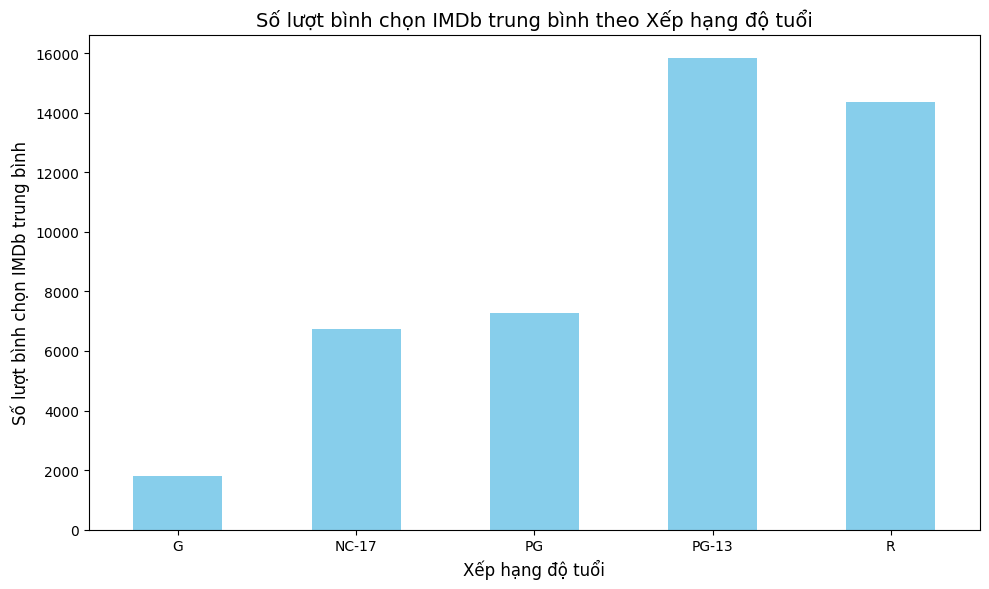

In [18]:
# Trung bình số lượt bình chọn IMDb theo từng phân loại độ tuổi
age_rating_avg_votes = age_rating_stats['mean']

plt.figure(figsize=(10, 6))
age_rating_avg_votes.plot(kind='bar', color='skyblue')
plt.title('Số lượt bình chọn IMDb trung bình theo Xếp hạng độ tuổi', fontsize=14)
plt.xlabel('Xếp hạng độ tuổi', fontsize=12)
plt.ylabel('Số lượt bình chọn IMDb trung bình', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Nhận xét**

- Phim nhắm đến khán giả thanh thiếu niên và người trưởng thành (**PG-13** và **R**) có mức độ phổ biến cao nhất, thể hiện qua số lượt bình chọn IMDb trung bình cao hơn đáng kể so với các nhóm khác.

- Phim dành cho trẻ em hoặc mọi lứa tuổi (**G** và **PG**) thường có mức độ phổ biến thấp hơn, có thể do đối tượng khán giả mục tiêu ít tham gia bình chọn trên IMDb.

- **NC-17** không phải là phân loại lý tưởng để thu hút sự phổ biến rộng rãi, do đối tượng khán giả bị giới hạn.

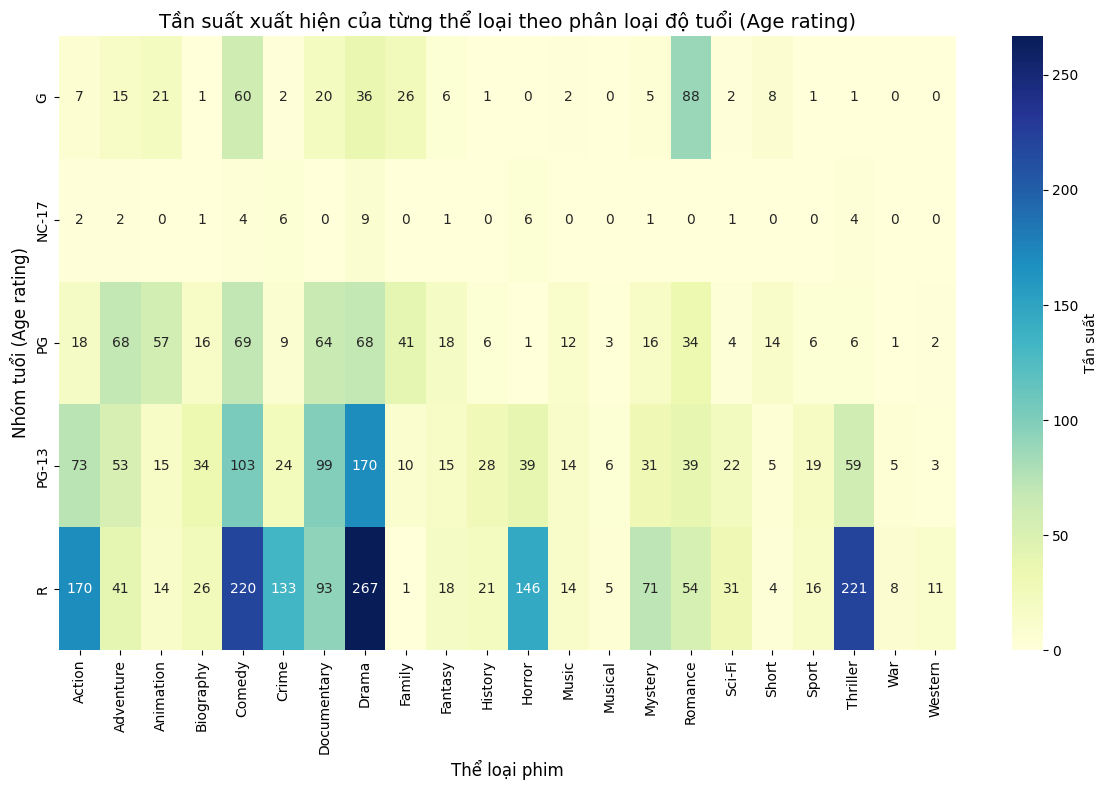

In [20]:
# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={"label": "Tần suất"})

# Thiết lập tiêu đề và nhãn
title = "Tần suất xuất hiện của từng thể loại theo phân loại độ tuổi (Age rating)"
plt.title(title, fontsize=14)
plt.xlabel("Thể loại phim", fontsize=12)
plt.ylabel("Nhóm tuổi (Age rating)", fontsize=12)

plt.tight_layout()
plt.show()

**Nhận xét**

- Các thể loại như Drama, Action, và Thriller chủ yếu hướng đến khán giả trong phân loại độ tuổi **R** và **PG-13**.

- Thể loại nhẹ nhàng hơn như Animation, Family, và Comedy lại phổ biến trong các nhóm **G** và **PG**.

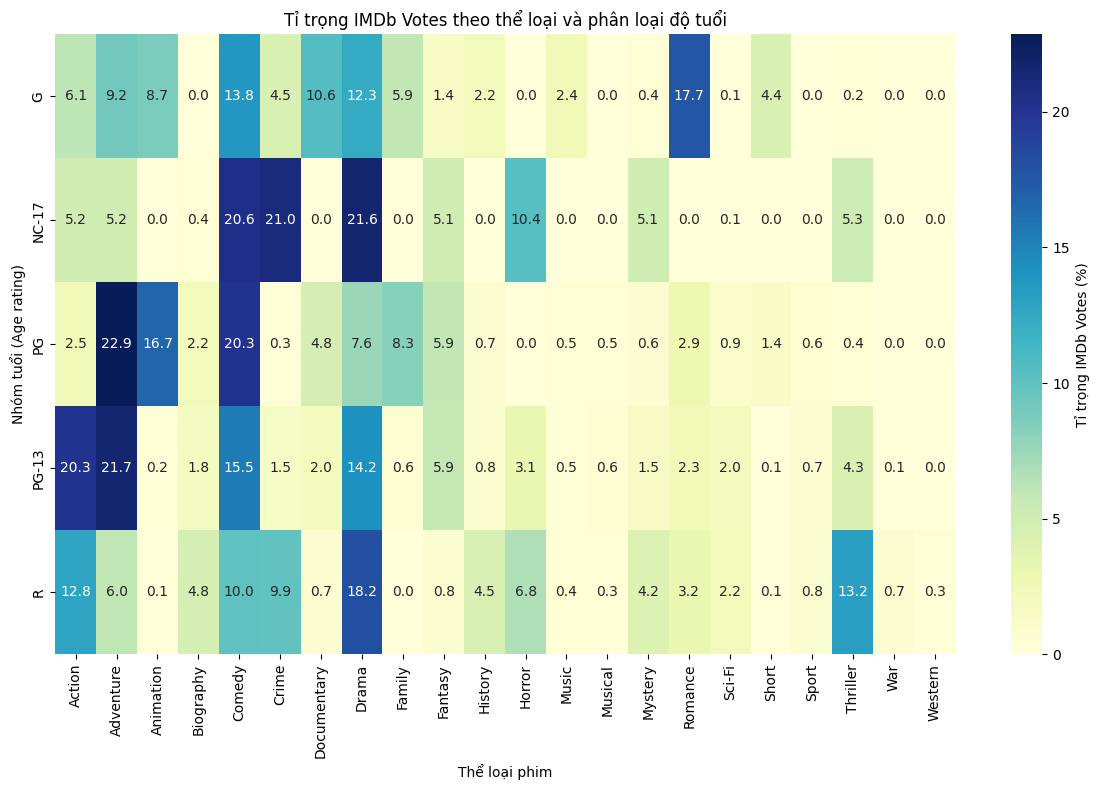

In [21]:
# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_percentage, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Tỉ trọng IMDb Votes (%)'})
plt.title("Tỉ trọng IMDb Votes theo thể loại và phân loại độ tuổi")
plt.xlabel("Thể loại phim")
plt.ylabel("Nhóm tuổi (Age rating)")
plt.tight_layout()
plt.show()

**Nhận xét**

- Tỉ trọng IMDb Votes phản ánh rõ rệt rằng các thể loại như Action, Drama, và Thriller được khán giả trưởng thành (**R**) và thanh thiếu niên (**PG-13**) đánh giá nhiều nhất.

- Thể loại nhẹ nhàng như Animation hay Family có tỉ trọng IMDb Votes khá khiêm tốn, dù xuất hiện thường xuyên trong nhóm trẻ em.

### **3.3. Nhận xét**

- **Phân loại độ tuổi R**: Yêu thích và đánh giá cao các thể loại như Drama, Thriller, Action, và Horror. Các thể loại này vừa có tần suất xuất hiện cao vừa có tỉ trọng IMDb Votes lớn.

- **Phân loại độ tuổi PG-13**: Thể loại Action, Drama, và Thriller phổ biến cả về tần suất lẫn tỉ trọng bình chọn, thể hiện sự hấp dẫn của các phim có nội dung kịch tính và hấp dẫn.

- **Phân loại độ tuổi G và PG**: Thể loại Animation, Family, và Comedy xuất hiện thường xuyên nhưng tỉ trọng IMDb Votes lại không quá cao, phản ánh mức độ tương tác của khán giả nhỏ tuổi thấp hơn.

- **Phân loại độ tuổi NC-17**: Tỉ trọng IMDb Votes cho thể loại như Comedy và Horror cao, dù tần suất xuất hiện của các thể loại này thấp.

#### **Kết luận chung**:

- Nhóm tuổi **PG-13** và **R** đóng vai trò quan trọng nhất trong việc xác định sự phổ biến và thành công của các thể loại phim như Action, Drama, và Thriller. Các nhà làm phim nên nhắm đến các đối tượng khán giả tuổi thanh thiếu niên (**PG-13**) hoặc trưởng thành (**R**) để tăng sức hút và mức độ phổ biến của phim trên thị trường.

- Các nhóm tuổi nhỏ tuổi có sự tập trung cao vào các thể loại Animation và Family nhưng ít đóng góp vào lượt bình chọn IMDb. Đối với các bộ phim dành cho trẻ em hoặc gia đình, cần có chiến lược khác (ví dụ: tiếp thị trên các nền tảng không phụ thuộc vào đánh giá của khán giả trưởng thành như IMDb) để gia tăng mức độ nhận diện và thu hút khán giả mục tiêu.